In [62]:
from ipyleaflet import *
thurles_point = (52.6801064,-7.804442099999999)
thurles = Map(center=(52.8001064,-7.804442099999999), zoom=8, basemap=basemaps.Esri.DeLorme)
ireland = Map(center=(53.4001064,-7.804442099999999), zoom=6, basemap=basemaps.Esri.DeLorme)
marker = Marker(location=thurles_point, draggable=False)
thurles.add_layer(marker)

In [63]:
thurles

Map(center=[52.8001064, -7.804442099999999], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_…

In [64]:
ireland

Map(center=[53.4001064, -7.804442099999999], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_…

In [65]:
#https://stackoverflow.com/questions/44800396/python-ipyleaflet-export-map-as-png-or-jpg-or-svg
from ipywebrtc import WidgetStream, ImageRecorder
thurles_stream = WidgetStream(widget=thurles, max_fps=1)
ireland_stream = WidgetStream(widget=ireland, max_fps=1)

In [74]:
thurles_img = ImageRecorder(stream=thurles_stream)
thurles_img.recording = True
thurles_img.autosave = False
thurles_img.download()

b''

In [75]:
import PIL.Image
import PIL.ImageFilter
import io
thurles_pil = PIL.Image.open(io.BytesIO(thurles_img.image.value))

In [81]:
ireland_img = ImageRecorder(stream=ireland_stream)
ireland_img.recording = True
ireland_img.autosave = False
ireland_img.download()

In [82]:
ireland_pil = PIL.Image.open(io.BytesIO(ireland_img.image.value))

In [47]:
#https://www.markroepke.me/posts/2019/06/05/tips-for-slideshows-in-jupyter.html
def hide_code_in_slideshow():   
    from IPython import display
    import binascii
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()    
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;
            while (!p.hasClass("cell")) {
                p=p.parent();
                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=True)

# Syllables as a Unit for Automatic Speech Recognition

### Jim O’Regan

# About Me

## Jim O'Regan

## /dʒɪm əʊˈɹiːgn̩/

## [dʒɪm ɔˈɹiːgn̩]

# From: Ireland

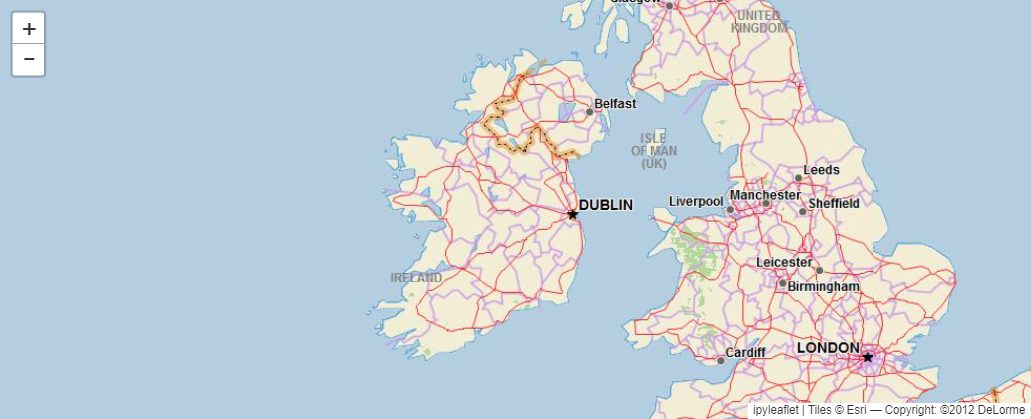

In [83]:
ireland_pil


# More specifically: Thurles

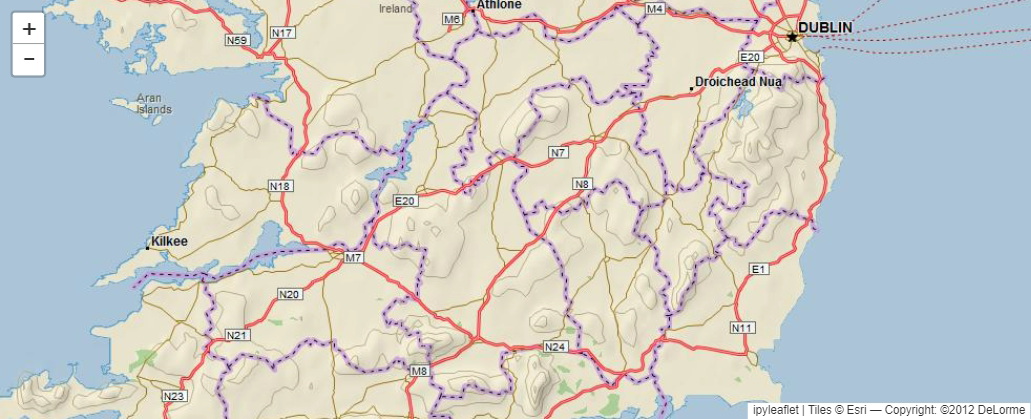

In [80]:
thurles_pil

(146 km from Dublin)

# Interests

## Language technology (text)

* Machine translation (past; Apertium, OpenMaTrEx, Moses)
* Optical character recognition (past; Tesseract)
* Entity linking (DBpedia Spotlight)
* Search (Lucene analysis)
* Stemming (Snowball)
* Part of speech tagging (FST-based, SpaCy)
* Grammar checking (LanguageTool)
* Corpus collection

# Interests

## Language technology (speech)

* Grapheme-to-phoneme conversion (G2P)
* Text normalisation
* Speech recognition


# Interests

## Digitisation

* Project Gutenberg, Wikisource

# Interests

## Speech recognition

* Speech corpus building from "found"/unconventional data
* Unsupervised/semi-supervised speech recognition
   * (also G2P, normalisation)
* Computer-assisted Pronunciation Training
* Code switching
* Multilingual speech recognition

# The assignment

> We assume, here, that we want to test a hypothesis that states that mapping acoustic
> vowels (with their non-vowel context) to vowels in phonetic transcription (with their
> non-vowel context) to the vowels in text (again, in with their context), on the one hand, would
> outperform a similar attempt to map acoustic realisations of phonemes to phonemic symbols
> to letters, on the other hand.
>
> Describe an experiment designed to test the hypothesis.

# Background

# Syllables

> **syllable** A unit of speech for which there is no satisfactory definition.
> Syllables seem to be necessary units in the mental organization and
> production of utterances. 
>
> Peter Ladefoged and Keith Johnson. *A Course in Phonetics.* 6th edition, 2011.


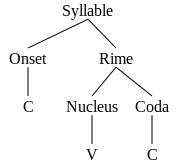

In [38]:
import svgling
svgling.draw_tree(("Syllable", ("Onset", "C"), ("Rime", ("Nucleus", "V"), ("Coda", "C"))))

# Some languages have regular syllabification

## Polish

* przepraszam /pʂɛˈpra.ʂam/

## Spanish

* enemigo /e.neˈmi.ɡo/

## Italian

* spaghetti /spaˈɡet.ti/

# English is not one of them

No agreement

* Maximum onset?
* Maximum offset?
* Sonority?
* Ambisyllabicity?

## Not syllable-timed vs. stress-timed

Goslin & Floccia found the same difficulties with French.

GOSLIN, J., & FLOCCIA, C. (2007). Comparing French syllabification in preliterate children and adults. *Applied Psycholinguistics*, 28(2), 341-367. doi:10.1017/S0142716407070178

# Syllables and speech recognition

Used since the earliest days of speech recognition

Fujimura[^1] appeared in the same volume as the first paper about DRAGON[^2]

[^1]: O. Fujimura, "Syllable as a unit of speech recognition," in *IEEE Transactions on Acoustics, Speech, and Signal Processing,* vol. 23, no. 1, pp. 82-87, February 1975, doi: 10.1109/TASSP.1975.1162631.

[^2]: J. Baker, "The DRAGON system--An overview," in *IEEE Transactions on Acoustics, Speech, and Signal Processing,* vol. 23, no. 1, pp. 24-29, February 1975, doi: 10.1109/TASSP.1975.1162650.


# Syllables and speech recognition

Chinese characters are effectively syllables

# My approach

* Regular speech recognition comparison
* Text insertion problem
* Graphones
* Statistical syllabification

# Corpus

## TIMIT

* Standard for phonetic evaluation
* Annotated at all levels

# Maybe not the best choice

> I have a policy of never answering questions about TIMIT because the real answer for any such question is, "Don't use TIMIT, and don't base your recipes on TIMIT".
>
> [Dan Povey, June 2019, `kaldi-help` mailing list](https://groups.google.com/g/kaldi-help/c/9buFi8v6Btg/m/3SKFgJI0AwAJ)

> The TIMIT testing protocol pretty much dictates that you are supposed to use the bigram phone LM, which is an extremely poor LM for that task.  That's one of the reasons why almost no results using TIMIT are meaningful-- because the use of a good LM is "not allowed", certain methods, like recurrent acoustic models and CTC, which *implicitly* do language modeling, appear to be doing well
>
> [Dan Povey, March 2017, `kaldi-help` mailing list](https://groups.google.com/g/kaldi-help/c/i17cx9SEVVo/m/w0uxwLE0BgAJ)

# Regular speech recognition comparison

* All elements the same, except the unit: syllables vs phonemes
* Existing recipes for phonetic systems: reuse with minimal changes

# Text insertion problem

* By analogy to G2P
* Insert a boundary symbol, dividing onset and coda
  * onset → on.set
  * coda → co.da

# Graphones

* Pairs of graphemes and phonemes

coda /koʊ.də/

```
(c, k) (o, oʊ) (d, d) (a, ə)
```

* Divide based on phonemes
* Extract + join graphemes

# Statistical syllabification

* English syllabification is contested
  * Learn from the data

# Statistical syllabification

* Unambiguous:
  * Monosyllabic words
  * First onset
  * Last coda

# Statistical syllabification

* Consider **all** possibilities

onset:

```
o nset
on set
ons et
```

# “Language model”

* Add all divisions as “sentences”
* Scale by their number: $1.0 \div N$
* Generate ngram model
* Score entire path with the model

| Word | Syllabification | Probability |
| -- | -- | -- |
| on | on | 1.0 |
| set | set | 1.0 |
| onset | o nset | 0.33 |
| onset | on set | 0.33 |
| onset | ons et | 0.33 |


# Discussion

# Drawbacks

* Data sparsity
  * Huge amount of syllables
  * TIMIT (5 hours) is quite small

# Drawbacks

* Assumption of equality in aligning syllables to audio
  * The use of other units—morphemes, whole words—suggests this is valid

# Do phonemes have an advantage?

* Non-standard words
  * Foreign names/loanwords

# Do syllables have an advantage?

* Length reduces ambiguity
* Subword advantage: compounds, prefixes

# Other possible units

* Syllable-guided morphemes
  * Huckvale & Fang[^3] use morphemes
  
[^3]: Mark Huckvale and Alex Chengyu Fang. Using phonologically-constrained morphological analysis in continuous speech recognition. *Computer Speech & Language,* 16(2):165–181, April 2002. ISSN 0885-2308. doi: 10.1006/csla.2001.0187.

| Count | Morph | C | M | C | M | C | M | C | M |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 172 | ab# | 22 | mono# | 7 | vice# | 159 | -ful | 233 | -ive |
| 40 | anti# | 14 | multi# | 263 | -able | 4 | -fuls | 2 | -ives |
| 39 | arch# | 3 | neo# | 47 | -ably | 12 | -hood | 149 | -ize |
| 21 | auto# | 14 | non# | 136 | -age | 1 | -hoods | 143 | -less |
| 471 | be# | 97 | out# | 849 | -al | 139 | -ian | 38 | -let |
| 168 | bi# | 121 | over# | 99 | -ance | 87 | -ible | 9 | -like |
| 1909 | co# | 51 | pan# | 125 | -ant | 108 | -ied | 1275 | -ly |
| 18 | counter# | 23 | poly# | 90 | -ary | 70 | -ier | 278 | -ment |
| 889 | de# | 38 | post# | 318 | -ation | 369 | -ies | 253 | -ness |
| 786 | di# | 405 | pre# | 38 | -ative | 24 | -iest | 1 | -ocracy |
| 396 | dis# | 418 | pro# | 1854 | -d | 77 | -ify | 331 | -or |
| 316 | en# | 5 | proto# | 14 | -dom | 75 | -ility | 55 | -ory |
| 432 | ex# | 6 | pseudo# | 1599 | -ed | 83 | -ily | 116 | -ous |
| 53 | fore# | 1481 | re# | 44 | -ee | 39 | -iness | 4353 | -s |
| 2 | hetero# | 8 | semi# | 20 | -eer | 2527 | -ing | 74 | -ship |
| 12 | homo# | 131 | sub# | 350 | -en | 694 | -ion | 3 | -ships |
| 5 | hyper# | 49 | super# | 89 | -ence | 268 | -ions | 33 | -ster |
| 45 | il# | 104 | sur# | 227 | -ent | 159 | -ise | 117 | -th |
| 247 | im# | 27 | tele# | 1546 | -er | 132 | -ish | 11 | -tion |
| 1036 | in# | 91 | trans# | 58 | -ery | 104 | -ism | 6 | -tive |
| 131 | inter# | 117 | tri# | 1693 | -es | 3 | -isms | 70 | -ual |
| 80 | ir# | 3 | ultra# | 11 | -ese | 144 | -ist | 58 | mal# |
| 767 | un# | 95 | -ess | 77 | -ists | 29 | mini# | 84 | under# |
| 110 | -est | 60 | -ite | 129 | mis# | 62 | uni# | 19 | -ette |
| 264 | -ity |


| Num. syllables | Count |
| -- | -- |
| 1 | 76 |
| 2 | 30 |
| 1-2 | 8 |
| 3 | 3 |
| 0-1 | 3 |
| 0 | 1 |


# Where's the neural?

* Bidirectional networks
* Joint training
  * Shared layers, separate classifiers

But:
* Need data

# Thank you!